# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Exploratory Data Analysis in Python - V2</h1>

Learn how to explore, visualize, and extract insights from data using exploratory data analysis (EDA) in Python.

So you’ve got some interesting data - where do you begin your analysis? This course will cover the process of exploring and analyzing data, from understanding what’s included in a dataset to incorporating exploration findings into a data science workflow.


Using data on unemployment figures and plane ticket prices, you’ll leverage Python to summarize and validate data, calculate, identify and replace missing values, and clean both numerical and categorical values. Throughout the course, you’ll create beautiful Seaborn visualizations to understand variables and their relationships.


For example, you’ll examine how alcohol use and student performance are related. Finally, the course will show how exploratory findings feed into data science workflows by creating new features, balancing categorical features, and generating hypotheses from findings.


By the end of this course, you’ll have the confidence to perform your own exploratory data analysis (EDA) in Python.You’ll be able to explain your findings visually to others and suggest the next steps for gathering insights from your data!

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Getting to Know a Dataset](#1)
    - Initial exploration
    - Data validation
    - Data summarization

* [2. Data Cleaning and Imputation](#2) 
    - Addressing missing data
    - Converting and analyzing categorical data
    - Working with numeric data
    - Handling outliers
    
* [3. Relationships in Data](#3)
    - Patterns over time
    - Correlation
    - Factor relationships and distributions
    
* [4. Turning Exploratory Analysis Into Action](#4)
    - Considerations for categorical data
    - Generating new features
    - Generating hypotheses
    - Congratulations

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- Begin by calculating the number of rows and columns and displaying the names of columns for each DataFrame. Change any column names for better readability.
- Experiment and compute a correlation matrix for variables in `nsfg`.
- Compute the simple linear regression of `WTKG3` (weight) and `HTM4` (height) in `brfss` (or any other variables you are interested in!). Then, compute the line of best fit and plot it. If the fit doesn't look good, try a non-linear model.

In [1]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Importing the course datasets
clean_books = pd.read_csv('datasets/clean_books.csv')
clean_unemployment = pd.read_csv('datasets/clean_unemployment.csv')
divorce = pd.read_csv('datasets/divorce.csv')
ds_salaries_clean = pd.read_csv('datasets/ds_salaries_clean.csv')
planes = pd.read_csv('datasets/planes.csv')

In [2]:
clean_books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [3]:
clean_unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [4]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [5]:
ds_salaries_clean.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [6]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Getting to Know a Dataset</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

What's the best way to approach a new dataset? Learn to validate and summarize categorical and numerical data and create Seaborn visualizations to communicate your findings.

### 1. Initial exploration

Welcome to this course on exploratory data analysis! I'm Izzy, and I'll be your coach for chapters one and three of this course. My friend and colleague George will guide you through chapters two and four.

**2. Exploratory Data Analysis**

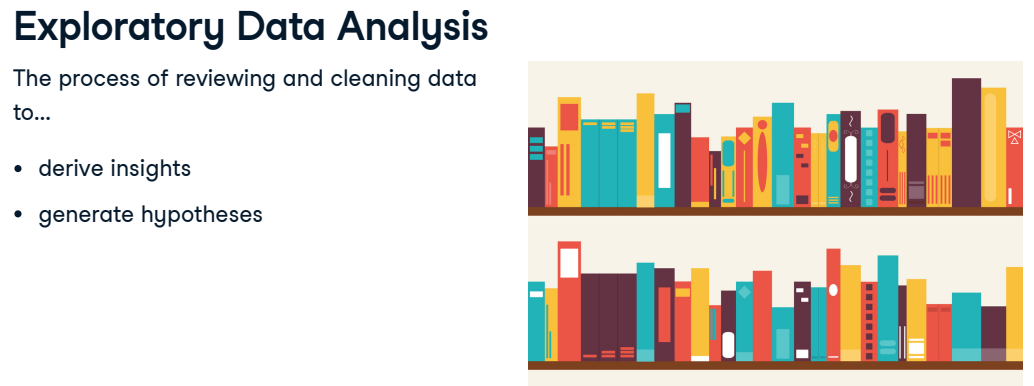

Let's say we've got a new dataset about books. Is this good data? What questions can it answer for us? It's only after we understand what our data contains that we can think about how the data might be useful to us. Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments. EDA results often inform the next steps for the dataset, whether that be generating hypotheses, preparing the data for use in a machine learning model, or even throwing the data out and gathering new data!

**3. A first look with .head()**

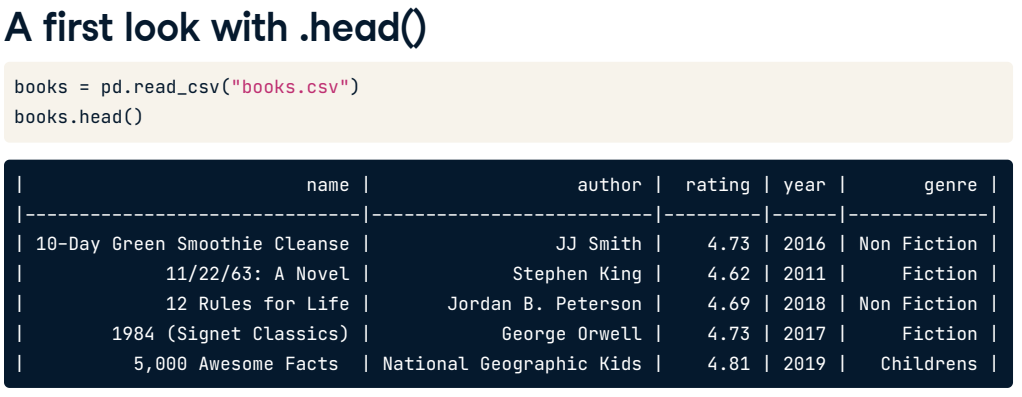

Let's begin by importing a dataset and reviewing some useful pandas methods for initial exploration! We'll import the books data from a csv file using pd-dot-read_csv and save it as a DataFrame called "books". Taking a look at the top of the DataFrame using the head function, we can see that our data contains columns representing book names, authors, ratings, publishing years, and genres.

**4. Gathering more .info()**

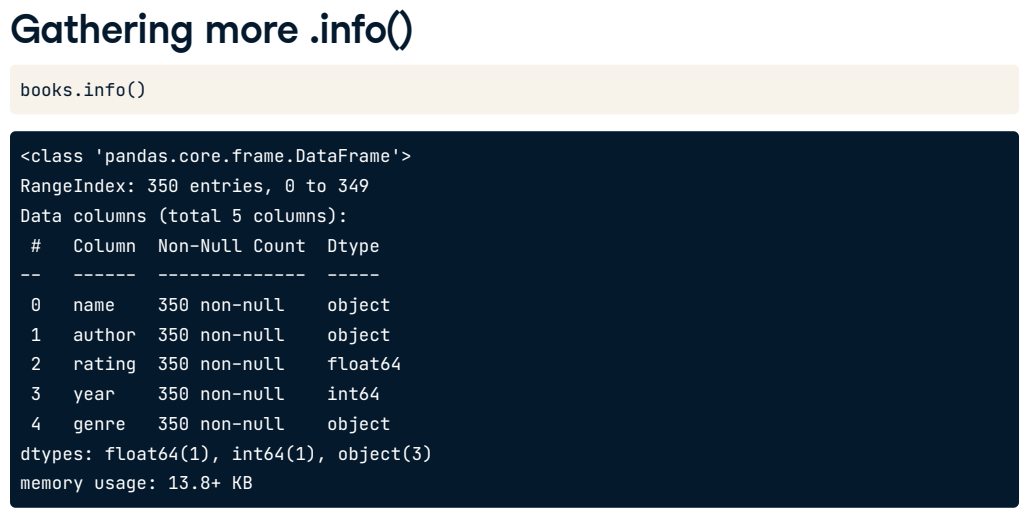

pandas also offers a quick way to summarize the number of missing values in each column, the data type of each column, and memory usage using the dot-info method. It looks like there are no missing values in our dataset, but it does have a variety of data types.

**5. A closer look at categorical columns**

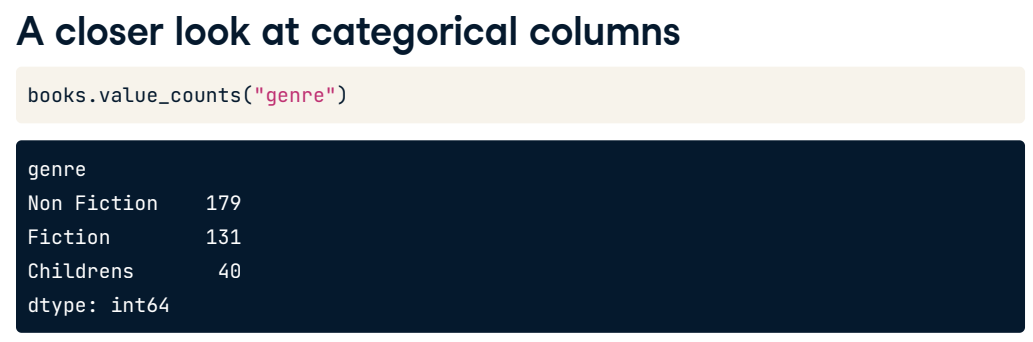

A common question about categorical columns in a dataset is how many data points we have in each category. For example, perhaps we're interested in the genres represented in our books data. We can select the genre column and use the pandas Series method dot-value_counts to find the number of books with each genre.

**6. .describe() numerical columns**

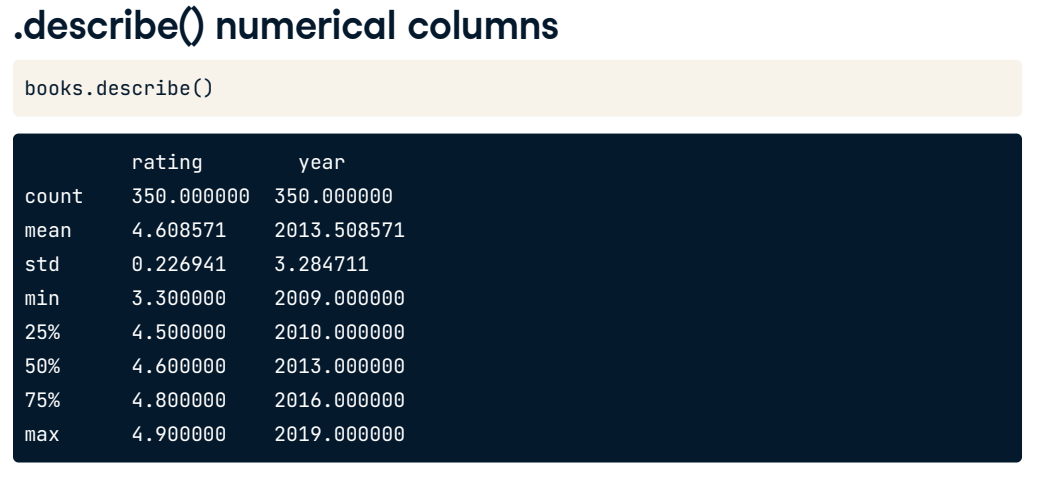

Gaining a quick understanding of data included in numerical columns is done with the help of the DataFrame-dot-describe method. Calling dot-describe on books, we see that it returns the count, mean, and standard deviation of the values in each numerical column (in this case rating and year), along with the min, max, and quartile values.

**7. Visualizing numerical data**

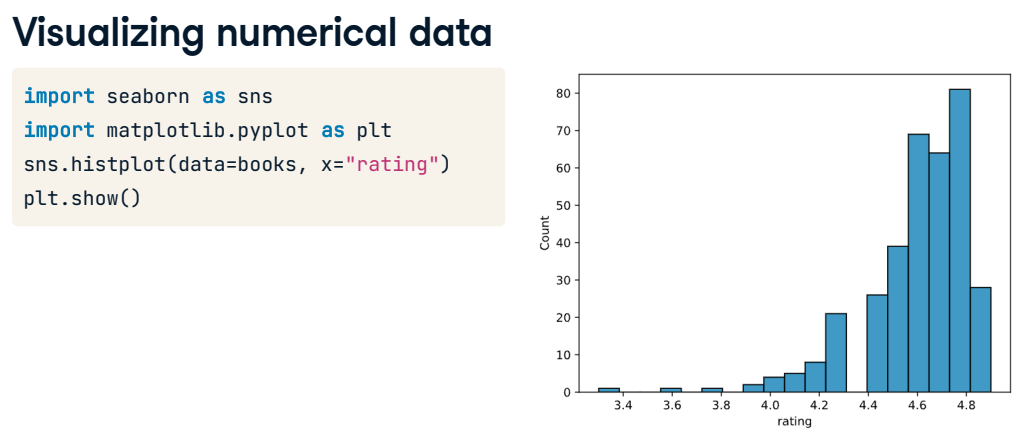

Histograms are a classic way to look at the distribution of numerical data by splitting numerical values into discrete bins and visualizing the count of values in each bin. Throughout this course, we'll use Seaborn to explore datasets visually. Seaborn is imported as s-n-s. We'll also import matplotlib-dot-pyplot aliased as plt. To create a histogram, we'll use sns-dot-histplot and pass the books DataFrame as the data argument. Next, we indicate which column we'd like to use as x by passing the column name rating to the x keyword argument. After running plt-dot-show to display the plot, we see that most books received ratings above 4-point-4, with very few getting ratings below 4-point-0. However, the bin size here is a little awkward. Ideally, we would have a bin for each tenth of a rating, such as a single bin for scores greater than 4-point-5 to 4-point-6 inclusive.

**8. Adjusting bin width**

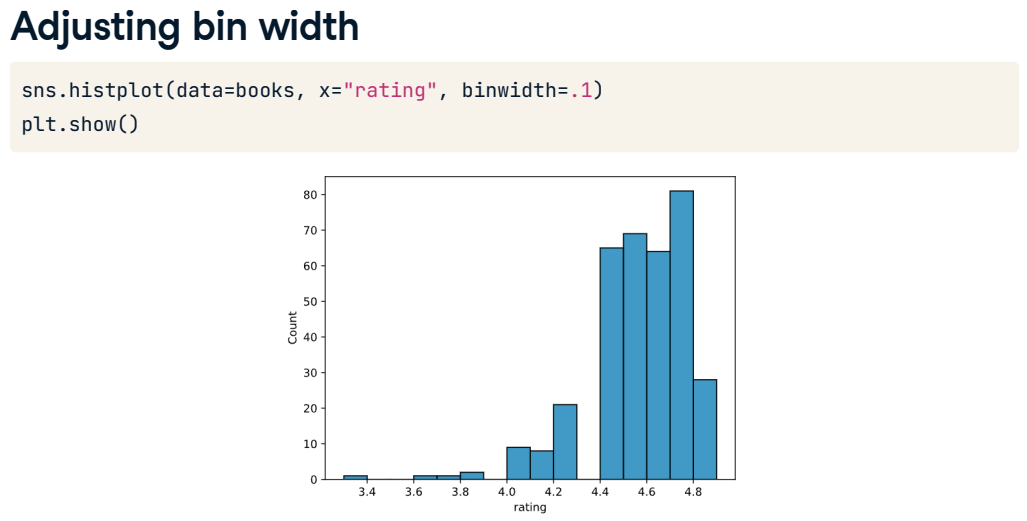

We can set a bin width of point-one using the binwidth keyword argument. That's better!

**9. Let's practice!**

Let's explore a brand new dataset using these skills.

### Exercise

**Functions for initial exploration**

You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called unemployment. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

- pandas has been imported for you as pd.

**Instructions**

- Use a pandas function to print the first five rows of the unemployment DataFrame.
- Use a pandas function to print a summary of column non-missing values and data types from the unemployment DataFrame.
- Print the summary statistics (count, mean, standard deviation, min, max, and quartile values) of each numerical column in unemployment.

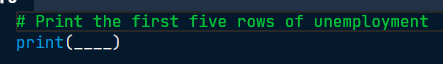
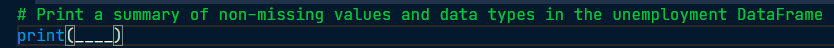
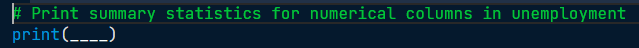

In [7]:
unemployment = clean_unemployment.copy()

In [8]:
# Print the first five rows of unemployment
print(unemployment.head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [9]:
# Print a summary of non-missing values and data types in the unemployment DataFrame
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [10]:
# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

### Exercise

**Counting categorical values**

Recall from the previous exercise that the unemployment DataFrame contains 182 rows of country data including country_code, country_name, continent, and unemployment percentages from 2010 through 2021.

You'd now like to explore the categorical data contained in unemployment to understand the data that it contains related to each continent.

The unemployment DataFrame has been loaded for you along with pandas as pd.

**Instructions**

- Use a pandas function to count the values associated with each continent in the unemployment DataFrame.

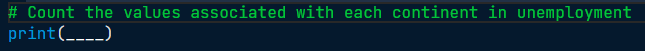

In [11]:
# Count the values associated with each continent in unemployment
print(unemployment.continent.value_counts())

Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: continent, dtype: int64


### Exercise

**Global unemployment in 2021**

It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

The unemployment DataFrame has been loaded for you along with pandas as pd.

**Instructions**

- Import the required visualization libraries.
- Create a histogram of the distribution of 2021 unemployment percentages across all countries in unemployment; show a full percentage point in each bin.

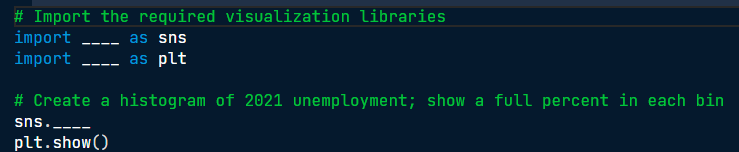

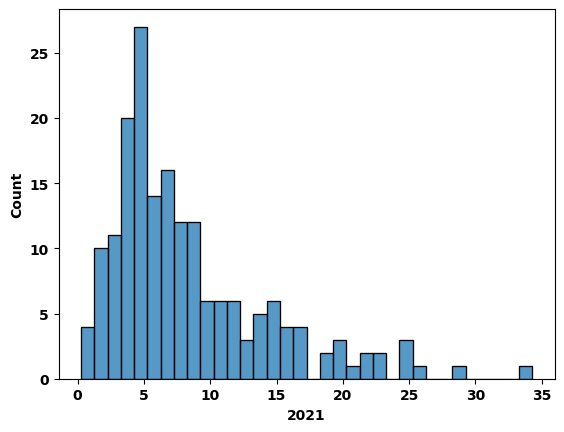

In [12]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

Nice work—it looks like 2021 unemployment hovered around 3% to 8% for most countries in the dataset, but a few countries experienced very high unemployment of 20% to 35%.

### 1. Data validation

Data validation is an important early step in EDA. We want to understand whether data types and ranges are as expected before we progress too far in our analysis! Let's dive in.

**2. Validating data types**

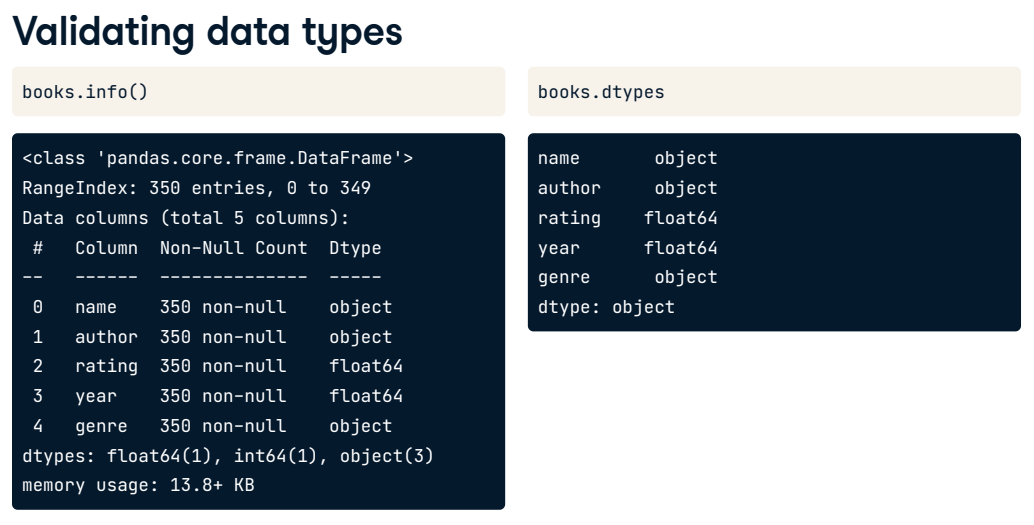

We learned in the last lesson that dot-info gives a quick overview of data types included in a dataset along with other information such as the number of non-missing values. We can also use the DataFrame dot-dtypes attribute if we're only interested in data types. But what if we aren't happy with these data types? Here, the year column in the books DataFrame is stored as a float, which doesn't make sense for year data, which should always be a whole number.

**3. Updating data types**

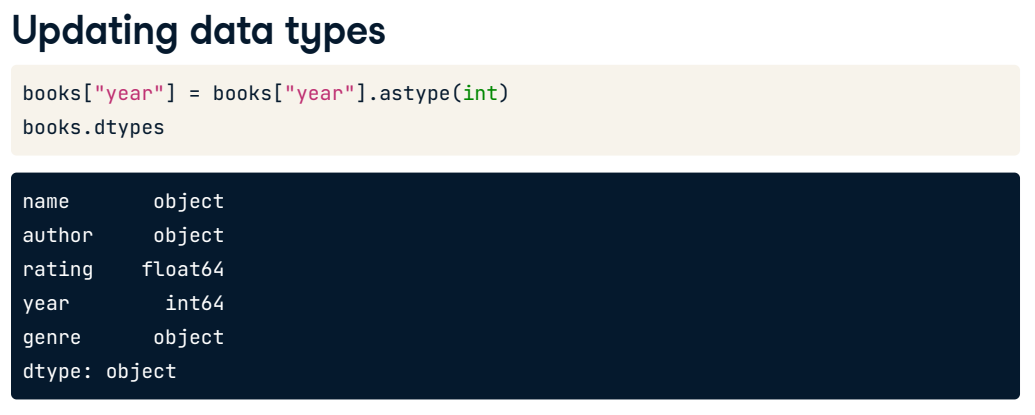

Luckily, the dot-astype function allows us to change data types without too much effort. Here, we redefine the year column by selecting the column and calling the **dot-astype method**, indicating we'd like to change the column to an integer. Then we use the **dot-dtypes attribute** to check that the year column data is now stored as integers - and it is!

**4. Updating data types**

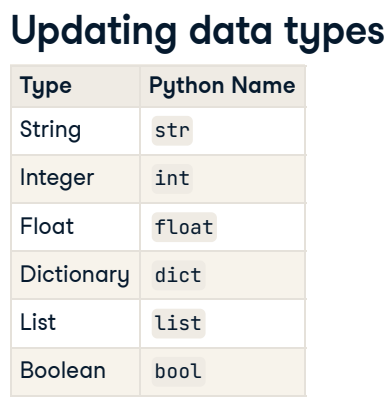

Common programming data types as well as their Python names are listed here. It's the Python name that we pass to the astype function, as we did with int on the previous slide.

**5. Validating categorical data**

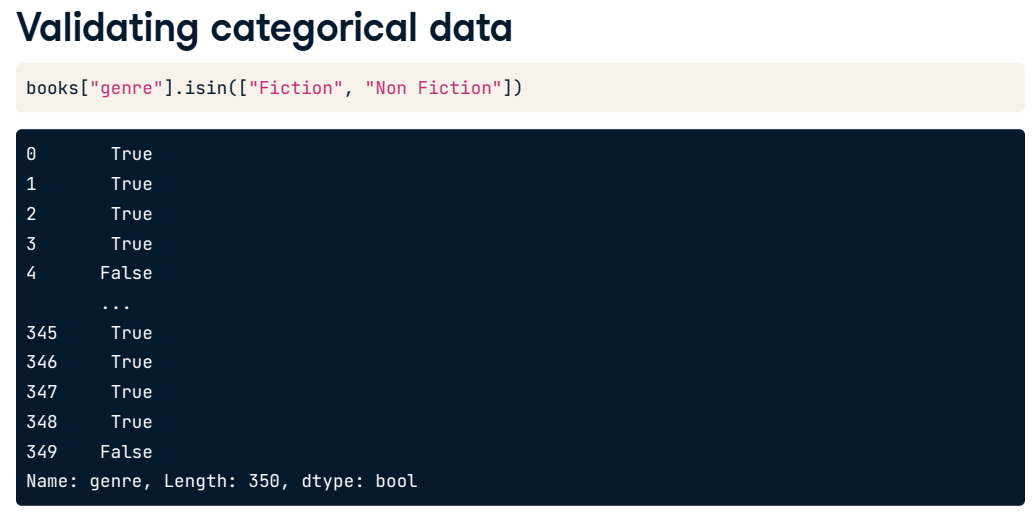

We can validate categorical data by comparing values in a column to a list of expected values using **dot-isin**, which can either be applied to a Series as we'll show here or to an entire DataFrame. Let's check whether the values in the genre column are limited to "Fiction" and "Non Fiction" by passing these genres as a list of strings to dot-isin. The function returns a Series of the same size and shape as the original but with True and False in place of all values, depending on whether the value from the original Series was included in the list passed to dot-isin. We can see that some values are False.

**6. Validating categorical data**

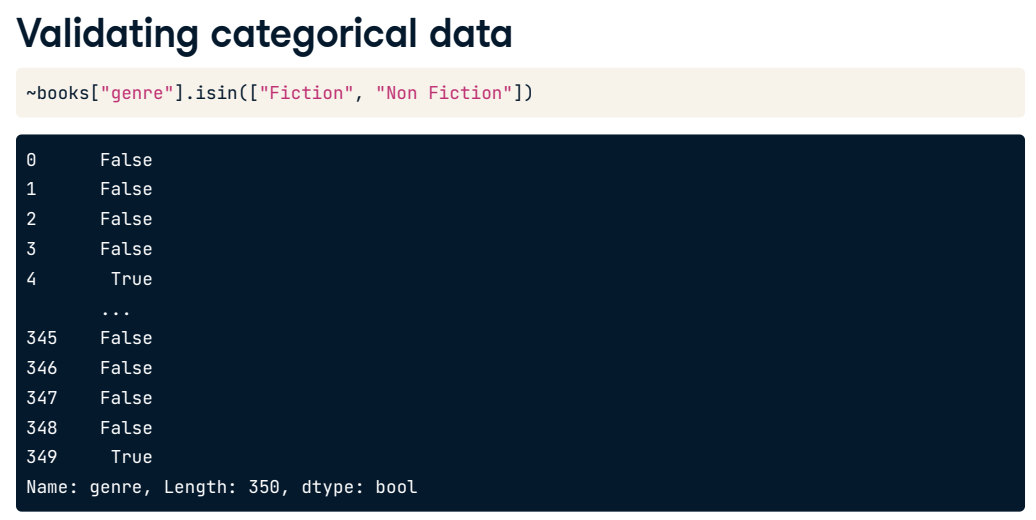

We can also use the **tilde operator**at the beginning of the code block to invert the True/ False values so that the function returns True if the value is **NOT in** the list passed to dot-isin.

**7. Validating categorical data**

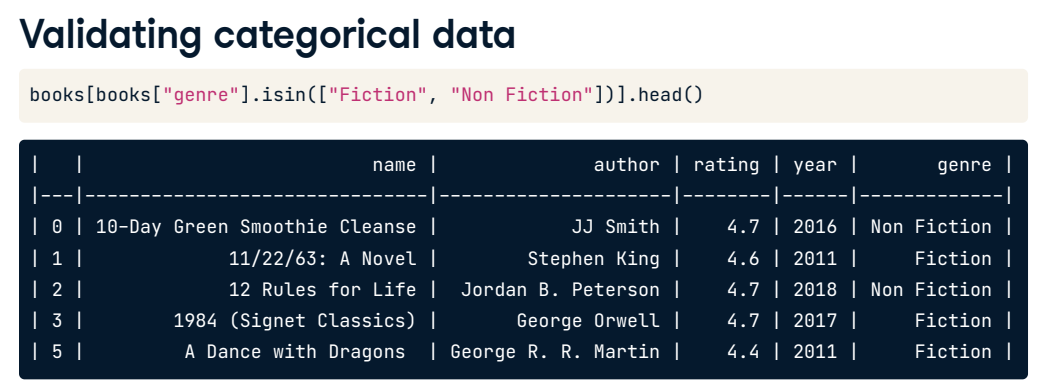

And if we're interested in filtering the DataFrame for only values that are in our list, we can use the isin code we just wrote to filter using Boolean indexing!

**8. Validating numerical data**

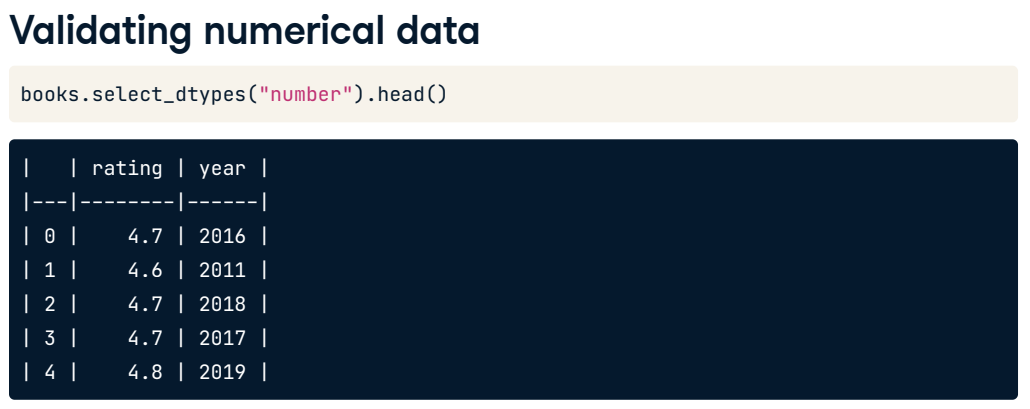

Let's now validate numerical data. We can select and view only the numerical columns in a DataFrame by calling the **select_dtypes method** and passing "number" as the argument.

**9. Validating numerical data**

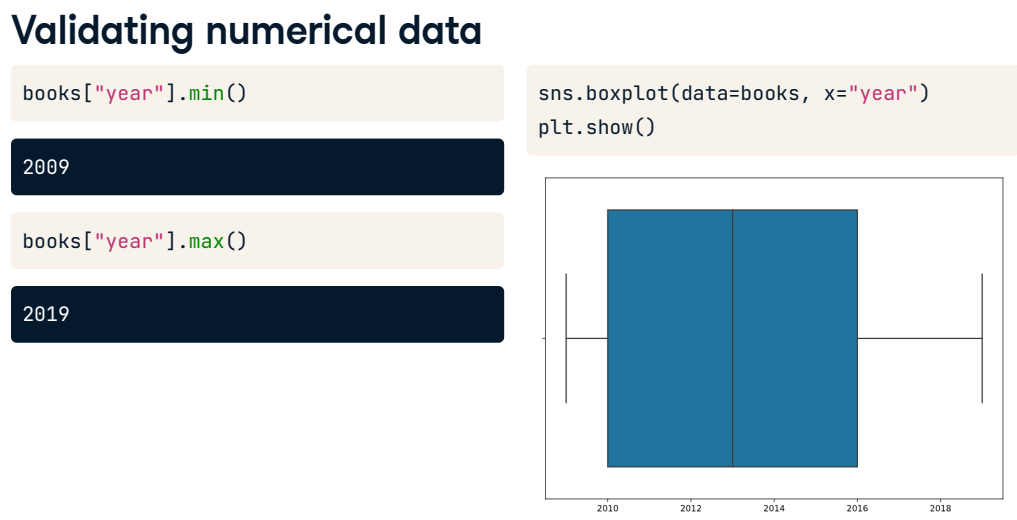

Perhaps we'd like to know the range of years in which the books in our dataset were published. We can check the lowest and highest years by using the dot-min and **dot-max functions**, respectively. And we can view a more detailed picture of the distribution of year data using Seaborn's **boxplot function**. The boxplot shows the boundaries of each quartile of year data: as we saw using min and max, the lowest year is 2009 and the highest year is 2019. The 25th and 75th percentiles are 2010 and 2016 and the median year is 2013.

**10. Validating numerical data**

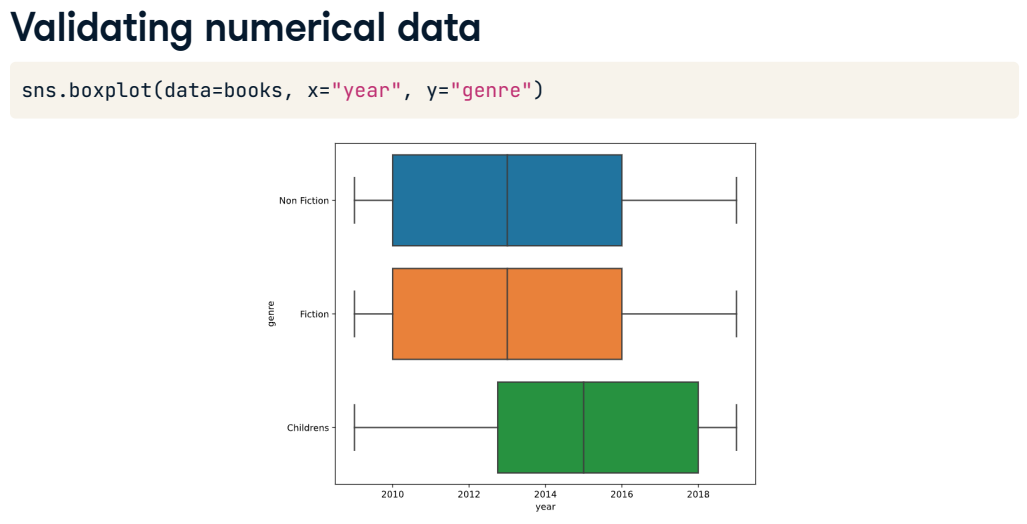

We can also view the year data grouped by a categorical variable such as genre by setting the y keyword argument. It looks like the children's books in our dataset have slightly later publishing years in general, but the range of years is the same for all genres.

**11. Let's practice!**

Now it's your turn to validate the unemployment data!

### Exercise

**Detecting data types**

A column has been changed in the unemployment DataFrame and it now has the wrong data type! This data type will stop you from performing effective exploration and analysis, so your task is to identify which column has the wrong data type and then fix it.

pandas has been imported as pd; unemployment is also available.

**Instructions**

- Question
    - Which of the columns below requires an update to its data type?
    
    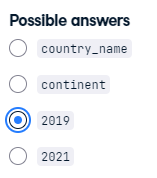
    
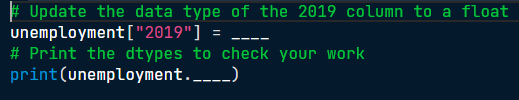

In [13]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [14]:
# Update the data type of the 2019 column to a float

# unemployment["2019"] = unemployment["2019"].astype(float)

# Print the dtypes to check your work

# print(unemployment.dtypes)

### Exercise

**Validating continents**

Your colleague has informed you that the data on unemployment from countries in Oceania is not reliable, and you'd like to identify and exclude these countries from your unemployment data. The .isin() function can help with that!

Your task is to use .isin() to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. This will set you up to use the results of .isin() to quickly filter out Oceania countries using Boolean indexing.

The unemployment DataFrame is available, and pandas has been imported as pd.

**Instructions**
- Define a Series of Booleans describing whether or not each continent is outside of Oceania; call this Series not_oceania.
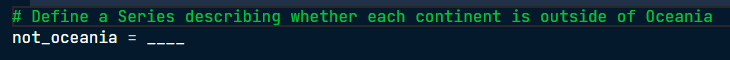
- Use Boolean indexing to print the unemployment DataFrame without any of the data related to countries in Oceania.
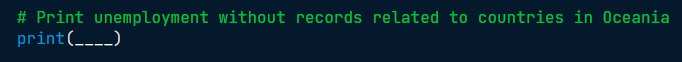

In [15]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])
not_oceania

0       True
1       True
2       True
3       True
4       True
       ...  
177    False
178     True
179     True
180     True
181     True
Name: continent, Length: 182, dtype: bool

In [16]:
# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

Well done! You validated categorical data and used your .isin() validation to then exclude data that you weren't interested in! Filtering out data that you don't need at the start of your EDA process is a great way to organize yourself for the exploration yet to come.

### Exercise

**Validating range**

Now it's time to validate our numerical data. We saw in the previous lesson using .describe() that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

Your task in this exercise is to get much more detailed information about the range of unemployment data using Seaborn's boxplot, and you'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

unemployment is available, and the following have been imported for you: Seaborn as sns, matplotlib.pyplot as plt, and pandas as pd.

**Instructions**

- Print the minimum and maximum unemployment rates, in that order, during 2021.
- Create a boxplot of 2021 unemployment rates, broken down by continent.

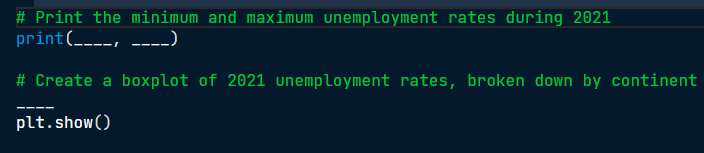

0.26 33.56


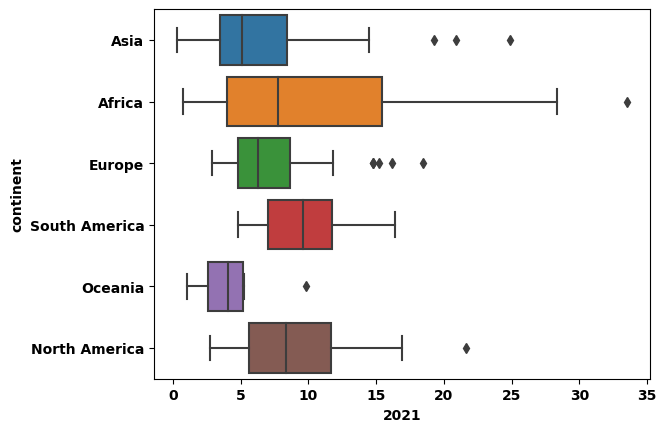

In [17]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x=unemployment['2021'], y=unemployment['continent'])
plt.show()

Nice work! Notice how different the ranges in unemployment are between continents. For example, Africa's 50th percentile is lower than that of North America, but the range is much wider.

### 1. Data summarization

We ended the last video by exploring data by genre, noticing that children's books in our dataset have slightly later publishing years in general.

**2. Exploring groups of data**

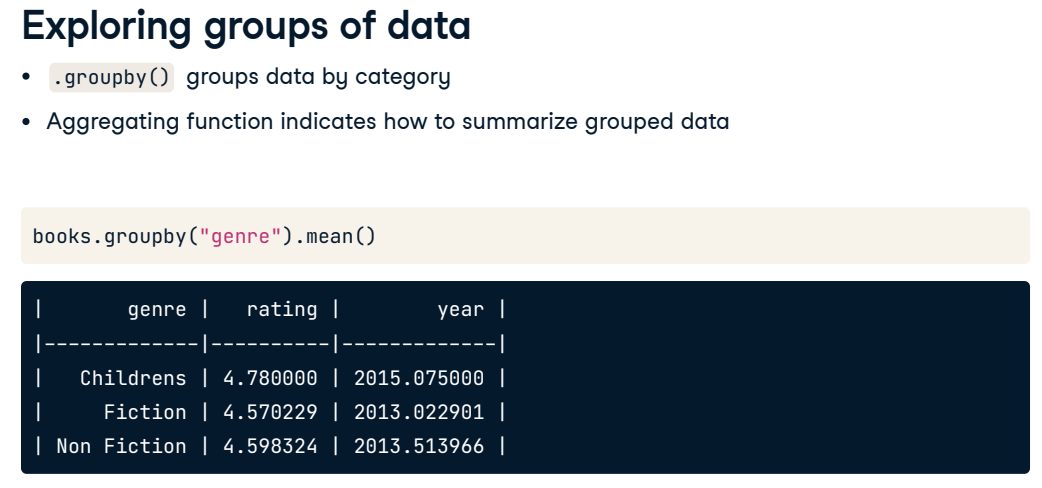

We can explore the characteristics of subsets of data further with the help of the **dot-groupby function**, which groups data by a given category, allowing the user to chain an **aggregating function like dot-mean or dot-count** to describe the data within each group. For example, we can group the books data by genre by passing the genre column name to the groupby function. Then, we chain an aggregating function, in this case, dot-mean, to find the mean value of the numerical columns for each genre. The results show that children's books have a higher average rating than other genres.

**3. Aggregating functions**

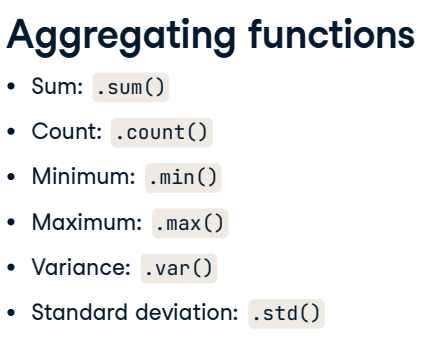

Other aggregating functions that are useful to chain with dot-groupby are **dot-sum, dot-count, dot-min, dot-max, dot-var, which returns the variance, and dot-std, which returns the standard deviation**.

**4. Aggregating ungrouped data**

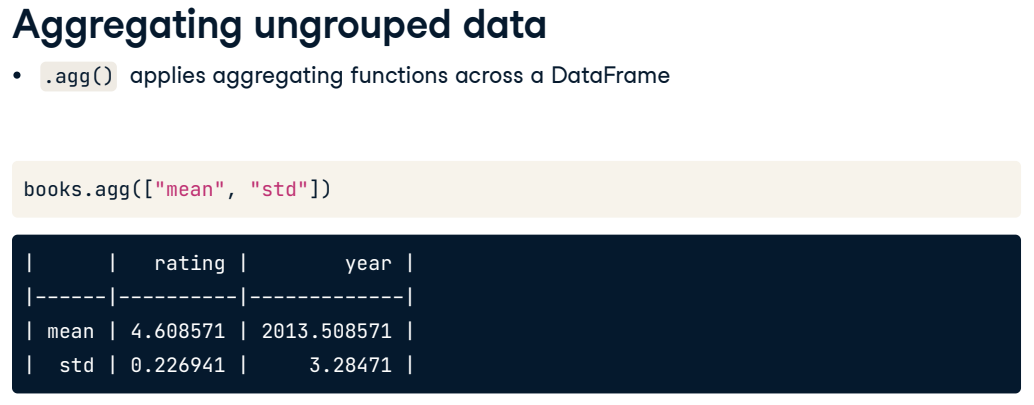

The **dot-agg function**, short for aggregate, allows us to apply aggregating functions. By default, **it aggregates data across all rows in a given column** and is typically used **when we want to apply more than one function**. Here, we apply dot-agg to the books DataFrame and **pass a list of aggregating functions to apply**: dot-mean and dot-std. Our code returns a DataFrame of aggregated results, and dot-agg applies these functions only to numeric columns; the rating and year columns in the books DataFrame.

**5. Specifying aggregations for columns**

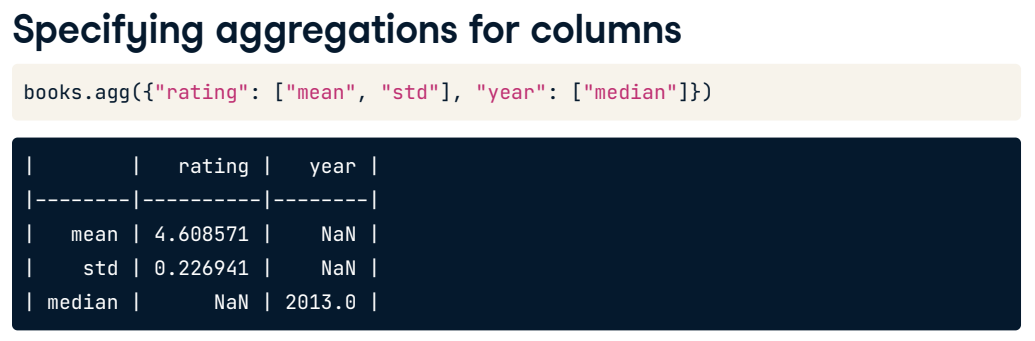

We can even use a **dictionary to specify which aggregation functions to apply to which columns**. The keys in the dictionary are the columns to apply the aggregation, and each value is a list of the specific aggregating functions to apply to that column.

**6. Named summary columns**

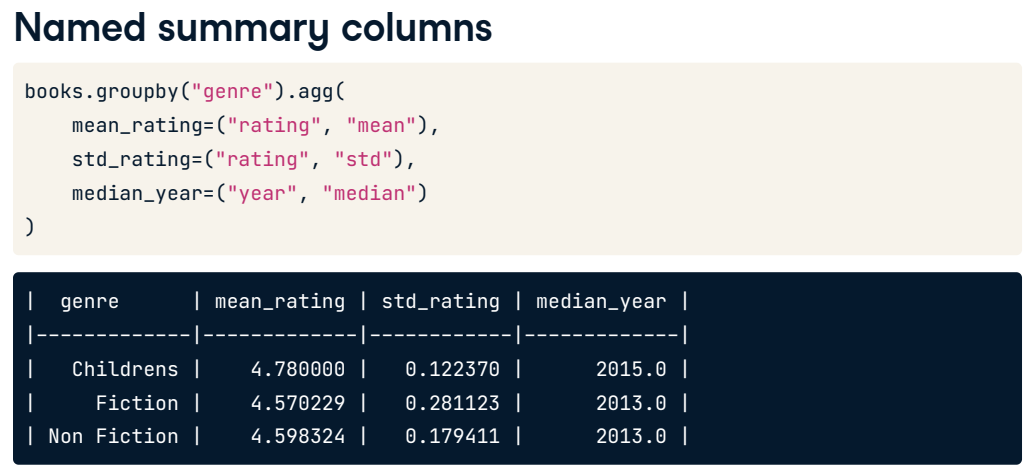

By **combining dot-agg and dot-groupby**, we can apply these new exploration skills to grouped data. Maybe we'd like to show the mean and standard deviation of rating for each book genre along with the median year. We can create **named columns** with our desired aggregations by using the dot-agg function and creating named tuples inside it. Each named tuple should include a column name followed by the aggregating function to apply to that column. The name of the tuple becomes the name of the resulting column. Now, we can get two summary values of interest about ratings and our year data looks cleaner! We can see that the Fiction genre has the lowest average rating as well as the largest variation in ratings.

**7. Visualizing categorical summaries**

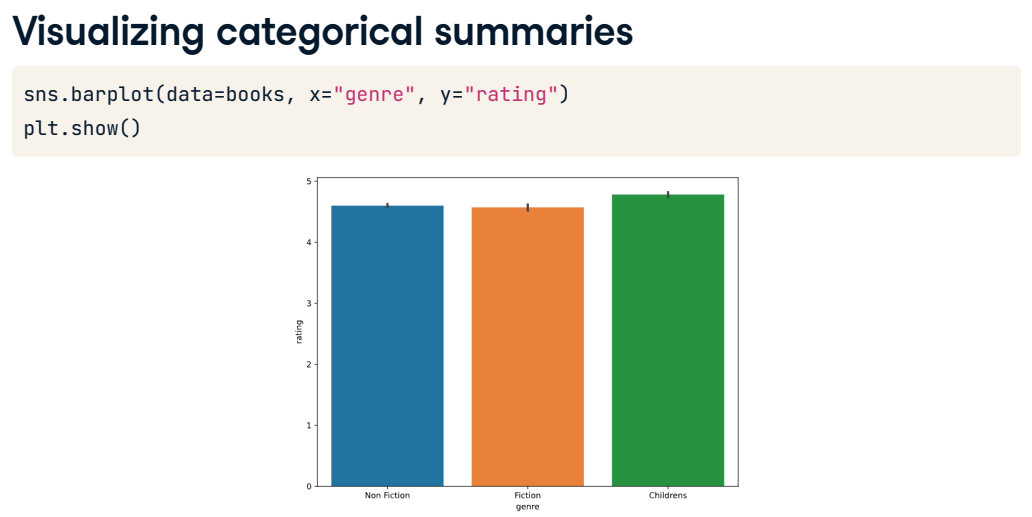

We can display similar information visually using a barplot. In Seaborn, bar plots will automatically calculate the mean of a quantitative variable like rating across grouped categorical data, such as the genre category we've been looking at. In Seaborn, bar plots also show a 95% confidence interval for the mean as a vertical line on the top of each bar. Here, we pass the genre column as the x values and the rating column as the y values. The results reinforce what we saw in the last slide: while Fiction books have the lowest rating, their ratings also have a little more variation.

**8. Let's practice!**

Alright, it's time to summarize the unemployment data in the exercises.

### Exercise

**Summaries with .groupby() and .agg()**

In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

The unemployment DataFrame is available, and pandas has been imported as pd.

**Instructions**
- Print the mean and standard deviation of the unemployment rates for each year.
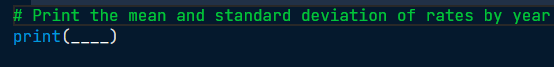
- Print the mean and standard deviation of the unemployment rates for each year, grouped by
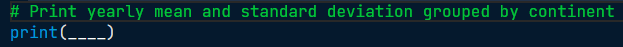

In [18]:
# Print the mean and standard deviation of rates by year
print(unemployment.agg(['mean','std']))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_16276\3373833377.py:2: FutureWarning: ['country_code', 'country_name', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.agg(['mean','std']))


In [19]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby('continent').agg(['mean','std']))

                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_16276\1964965302.py:2: FutureWarning: ['country_code', 'country_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.groupby('continent').agg(['mean','std']))


Nicely done! This data is well-summarized, but it's a little long. What if you wanted to focus on a summary for just one year and make it more readable? Give it a go in the next exercise!

### Exercise

**Named aggregations**

You've seen how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

The unemployment DataFrame is available, and pandas has been imported as pd.

**Instructions**

- Create a column called mean_rate_2021 which shows the mean 2021 unemployment rate for each continent.
- Create a column called std_rate_2021 which shows the standard deviation of the 2021 unemployment rate for each continent.

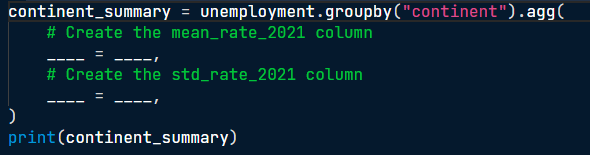

In [20]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021','std')
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


Super summarizing! Average 2021 unemployment varied widely by continent, and so did the unemployment within those continents.

### Exercise

**Visualizing categorical summaries**

As you've learned in this chapter, Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.

unemployment is available, and the following have been imported for you: Seaborn as sns, matplotlib.pyplot as plt, and pandas as pd.

**Instructions**

- Create a bar plot showing continents on the x-axis and their respective average 2021 unemployment rates on the y-axis.

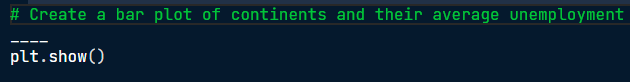

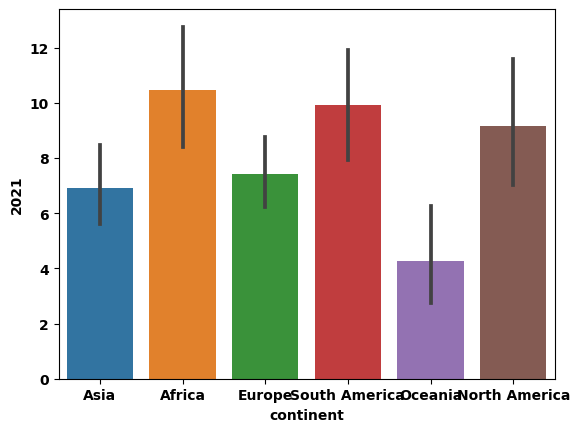

In [21]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data=unemployment, x='continent', y='2021')
plt.show()

A perfect plot! Way to go. While Europe has higher average unemployment than Asia, it also has a smaller confidence interval for that average, so the average value is more reliable.

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. Data Cleaning and Imputation</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!

### 1. Addressing missing data

Hi, I'm George, and in this video we'll look at strategies for handling missing data.

**2. Why is missing data a problem?**

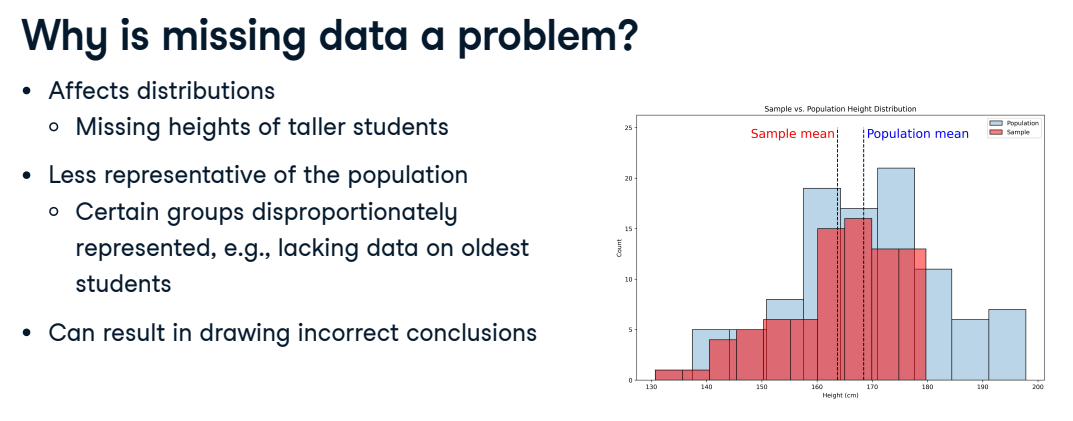

So, why is it important to deal with missing data? Well, it can affect distributions. As an example, we collect the heights of students at a high school. If we fail to collect the heights of the oldest students, who were taller than most of our sample, then our sample mean will be lower than the population mean. Put another way, our data is less representative of the underlying population. In this case, parts of our population aren't proportionately represented. This misrepresentation can lead us to draw incorrect conclusions, like thinking that, on average, students are shorter than they really are.

**3. Data professionals' job data**

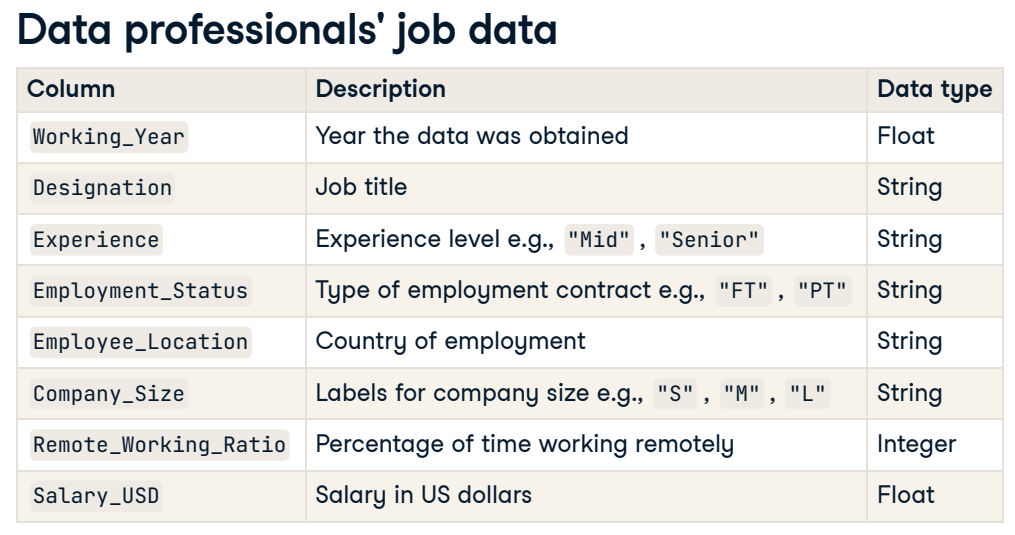

Let's illustrate how missing data impacts exploratory analysis using a dataset about data professionals. This dataset includes the year the data was obtained, job title, experience level, type of employment, location, company size, time spent working remotely, and salary in US dollars.

**4. Salary by experience level**

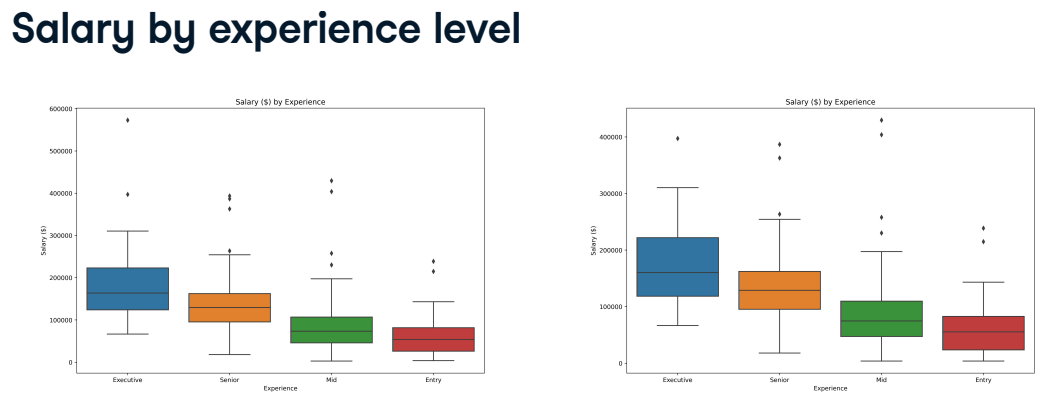

To highlight the impact of missing values, let's look at salaries by experience level using a full version of the dataset. Now, let's compare this to the same data with some missing values. The y-axis shows that the largest salary is around 150000 dollars less in the second plot!

**5. Checking for missing values**

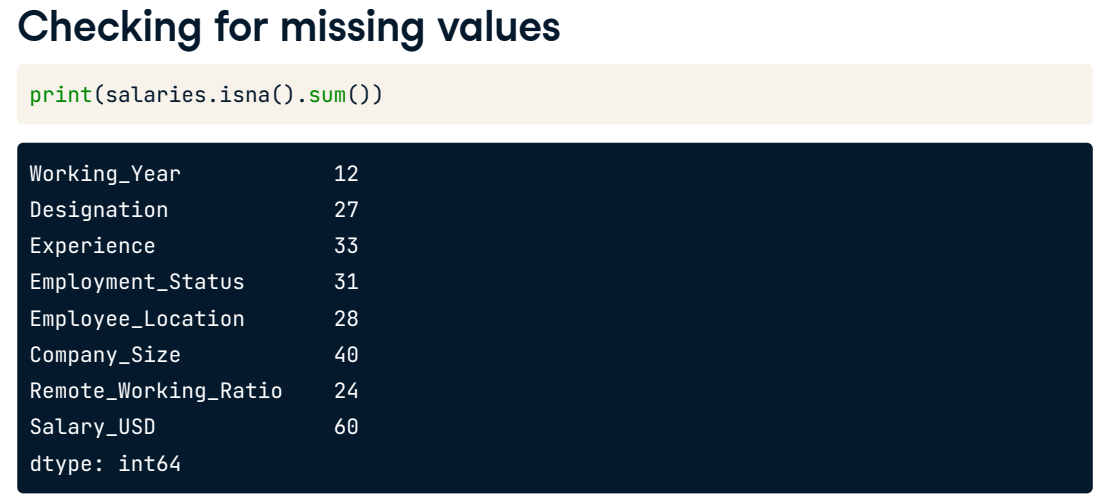

With our dataset stored as a pandas DataFrame called salaries, we can count the number of missing values per column by chaining the dot-isna and dot-sum methods. isna refers to the fact that missing values are represented as na in DataFrames. The output shows all columns contain missing values, with Salary_USD missing 60 values.

**6. Strategies for addressing missing data**

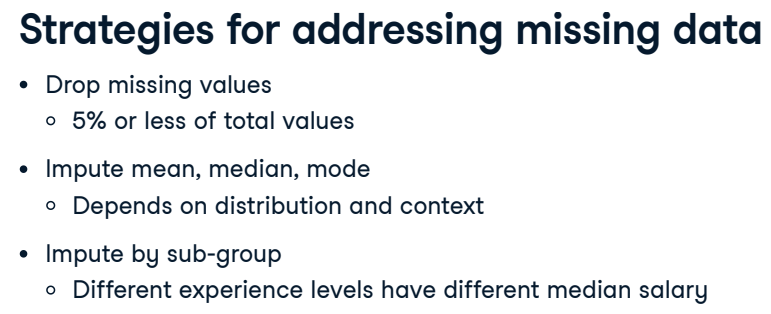

There are various approaches to handle missing data. One rule of thumb is to remove observations if they amount to five percent or less of all values. If we have more missing values, instead of dropping them, we can replace them with a summary statistic like the mean, median, or mode, depending on the context. This is known as imputation. Alternatively, we can impute by sub-groups. We saw that median salary varies by experience, so we could impute different salaries depending on experience.

**7. Dropping missing values**

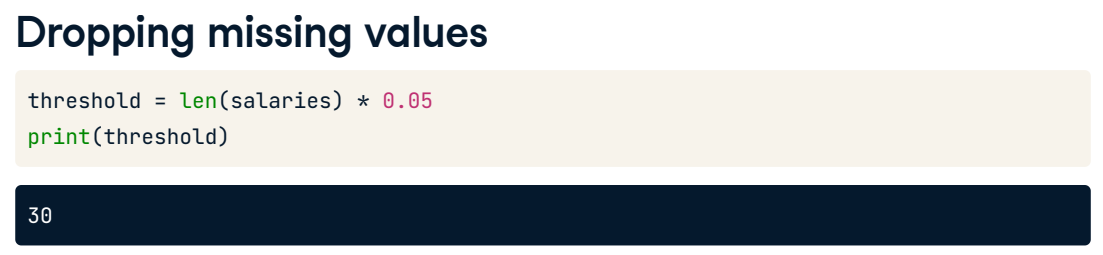

To calculate our missing values threshold we multiply the length of our DataFrame by five percent, giving us an upper limit of 30.

**8. Dropping missing values**

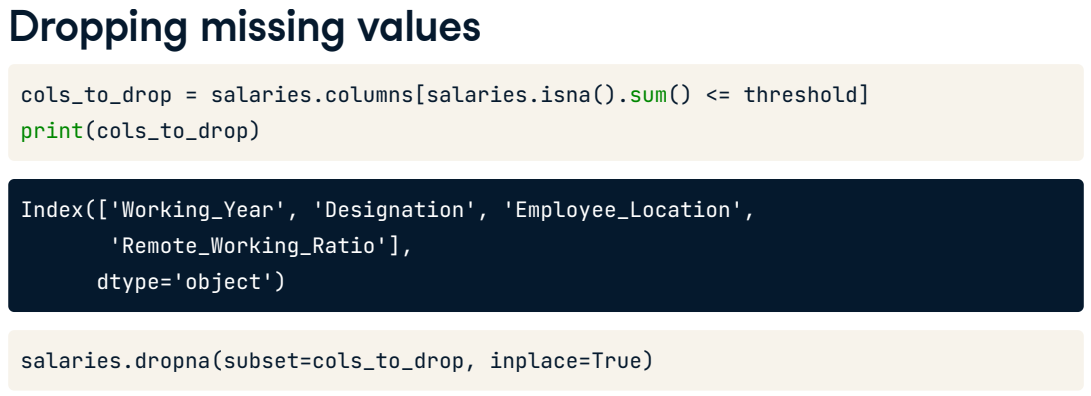

We can use Boolean indexing to filter for columns with missing values less than or equal to this threshold, storing them as a variable called cols_to_drop. Printing cols_to_drop shows four columns. We drop missing values by calling dot-dropna, passing cols_to_drop to the subset argument. We set inplace to True so the DataFrame is updated.

**9. Imputing a summary statistic**

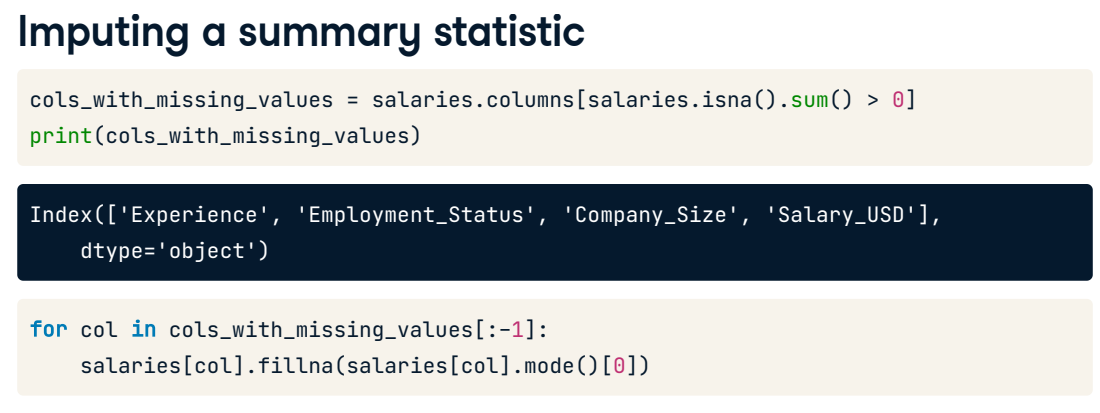

We then filter for the remaining columns with missing values, giving us four columns. To impute the mode for the first three columns, we loop through them and call the dot-fillna method, passing the respective column's mode and indexing the first item, which contains the mode, in square brackets.

**10. Checking the remaining missing values**

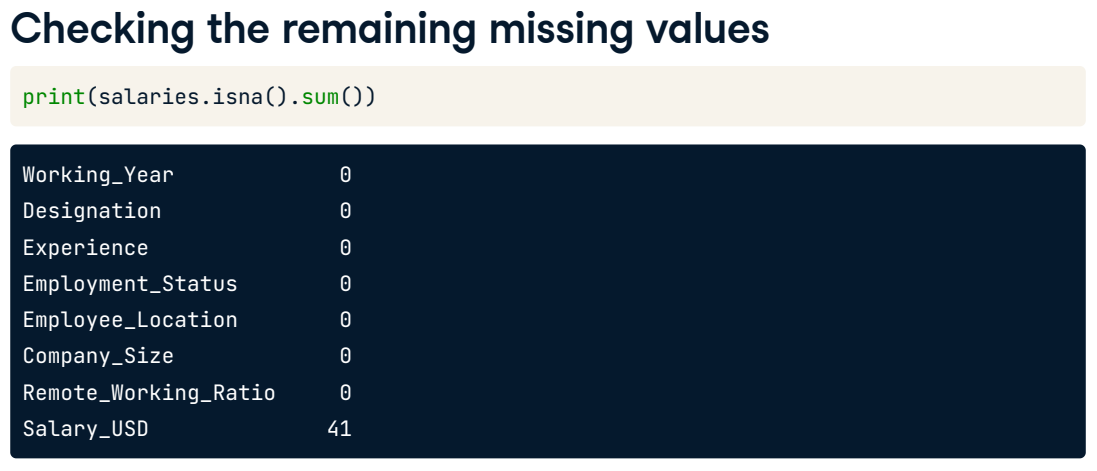

Checking for missing values again, we see salary_USD is now the only column with missing values and the volume has changed from 60 missing values to 41. This is because some rows may have contained missing values for our subset columns as well as salary, so they were dropped.

**11. Imputing by sub-group**

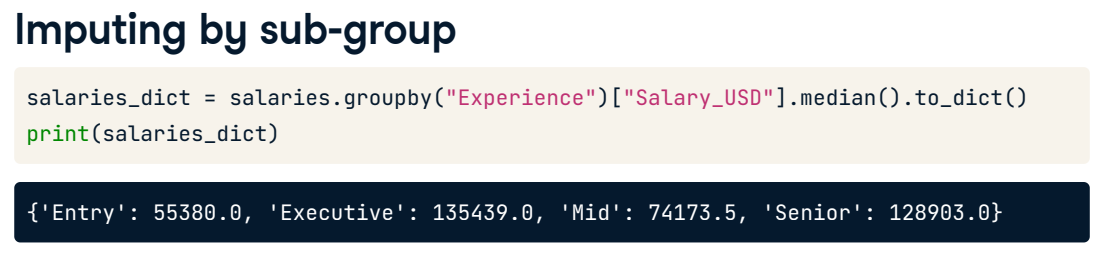

We'll impute median salary by experience level by grouping salaries by experience and calculating the median. We use the dot-to-dict method, storing the grouped data as a dictionary. Printing the dictionary returns the median salary for each experience level, with executives earning the big bucks!

**12. Imputing by sub-group**

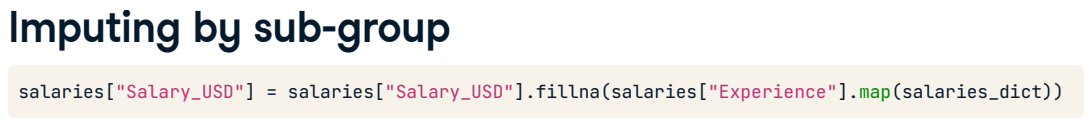

We then impute using the dot-fillna method, providing the Experience column and calling the dot-map method, inside which we pass the salaries dictionary.

**13. No more missing values!**

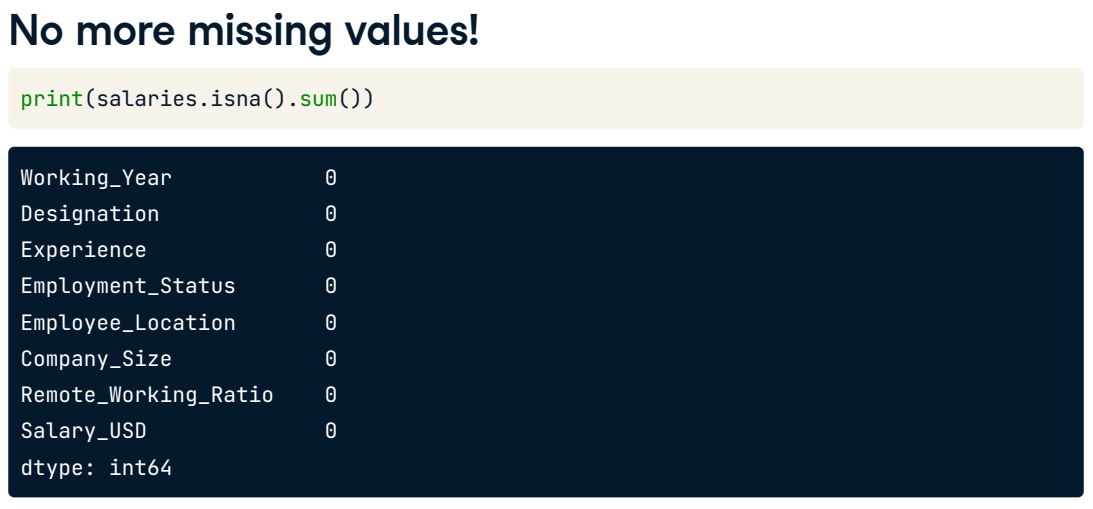

Now we see there are no more missing values!

**14. Let's practice!**

Let's practice working with missing data!

### Exercise

**Dealing with missing data**

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

**Instructions**

- Print the number of missing values in each column of the DataFrame.
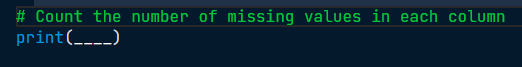
- Calculate how many observations five percent of the planes DataFrame is equal to.
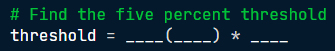
- Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
- Use this filter to remove missing values and save the updated DataFrame.
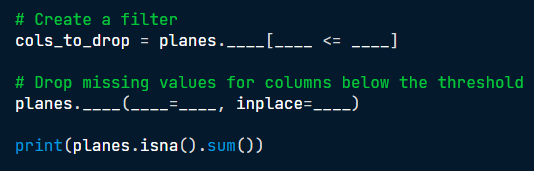

In [22]:
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


In [23]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [24]:
plane = planes.copy()

In [25]:
# Count the number of missing values in each column
print(plane.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [27]:
# Find the five percent threshold
threshold = len(plane) * 0.05
threshold

533.0

In [28]:
# Create a filter
cols_to_drop = plane.columns[plane.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
plane.dropna(subset=cols_to_drop, inplace=True)

print(plane.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Awesome! By creating a missing values threshold and using it to filter columns, you've managed to remove missing values from all columns except for "Additional_Info" and "Price".

### Exercise

**Strategies for remaining missing data**

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

The following imports have been made for you:

- import pandas as pd
- import seaborn as sns
- import matplotlib.pyplot as plt

**Instructions**

- Print the values and frequencies of "Additional_Info".
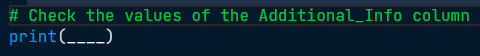
- Create a boxplot of "Price" by "Airline".
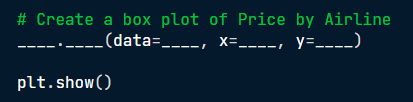
- Question : How should you deal with the missing values in "Additional_Info" and "Price"?
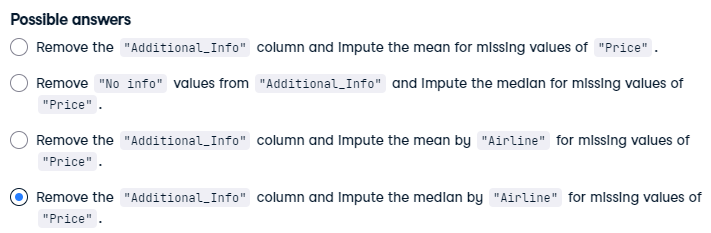

In [29]:
# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts(dropna=False))

No info                         7867
In-flight meal not included     1874
NaN                              589
No check-in baggage included     299
1 Long layover                    18
Change airports                    7
No Info                            2
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


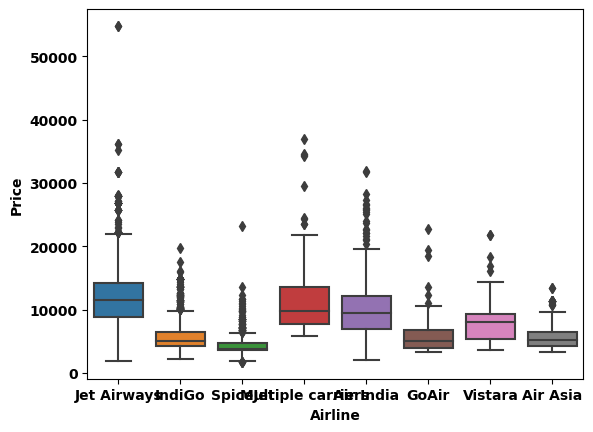

In [30]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()

Excellent! You don't need the "Additional_Info" column, and should impute median "Price" by "Airline" to accurately represent the data!

### Exercise

**Imputing missing plane prices**

Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

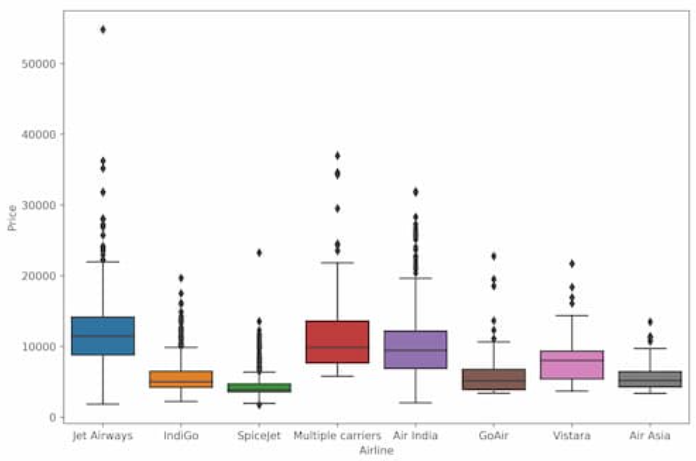

**Instructions**

- Group planes by airline and calculate the median price.
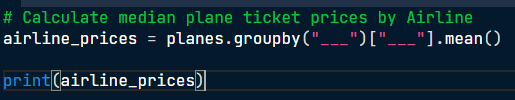
- Convert the grouped median prices to a dictionary.
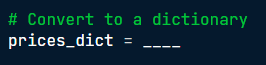
- Conditionally impute missing values for "Price" by mapping values in the "Airline column" based on prices_dict.
- Check for remaining missing values.
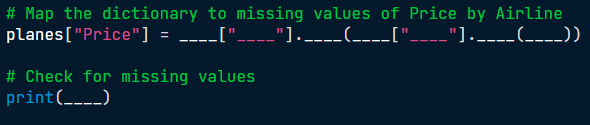

In [34]:
plane.drop('Additional_Info', axis=1, inplace=True)

In [35]:
# Calculate median plane ticket prices by Airline
airline_prices = plane.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5048.0
IndiGo                5013.0
Jet Airways          11467.0
Multiple carriers     9871.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [36]:
# Convert to a dictionary
prices_dict = planes.groupby("Airline")["Price"].median().to_dict()
prices_dict

{'Air Asia': 5192.0,
 'Air India': 9443.0,
 'GoAir': 5135.0,
 'IndiGo': 5013.0,
 'Jet Airways': 11467.0,
 'Multiple carriers': 9871.0,
 'SpiceJet': 3873.0,
 'Vistara': 8028.0}

In [37]:
# Map the dictionary to missing values of Price by Airline
plane["Price"] = plane["Price"].fillna(plane["Airline"].map(prices_dict))

# Check for missing values
print(plane.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


Impressive imputing! You converted a grouped DataFrame to a dictionary and then used it to conditionally fill missing values for "Price" based on the "Airline"! Now let's explore how to perform exploratory analysis on categorical data.

## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. Relationships in Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Variables in datasets don't exist in a vacuum; they have relationships with each other. In this chapter, you'll look at relationships across numerical, categorical, and even DateTime data, exploring the direction and strength of these relationships as well as ways to visualize them.

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Turning Exploratory Analysis into Action</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Exploratory data analysis is a crucial step in the data science workflow, but it isn't the end! Now it's time to learn techniques and considerations you can use to successfully move forward with your projects after you've finished exploring!